In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import OrderedDict
plt.style.use('ggplot')

In [42]:
PATH = '../Logs/'
BMs = ['array', 'list', 'tree', 'graph']
GTAs = ['RDFS', 'IDFS', 'BFS']
ALGOs = ['Tracing', 'Counting_Instant', 'Counting_Late']
DATA_SIZE = 32_768
filenames = {(algo, bm, gta):
    f'{PATH}{bm}_bm/{bm}_bm_{algo}_{gta}_{DATA_SIZE}'
    for bm in BMs
    for gta in GTAs
    for algo in ALGOs
}
times = {key: np.array([pd.read_csv(filename + f'_{i}.csv')['Dt (μs)'].sum() for i in range(1, 10+1)]) for key, filename in filenames.items()}

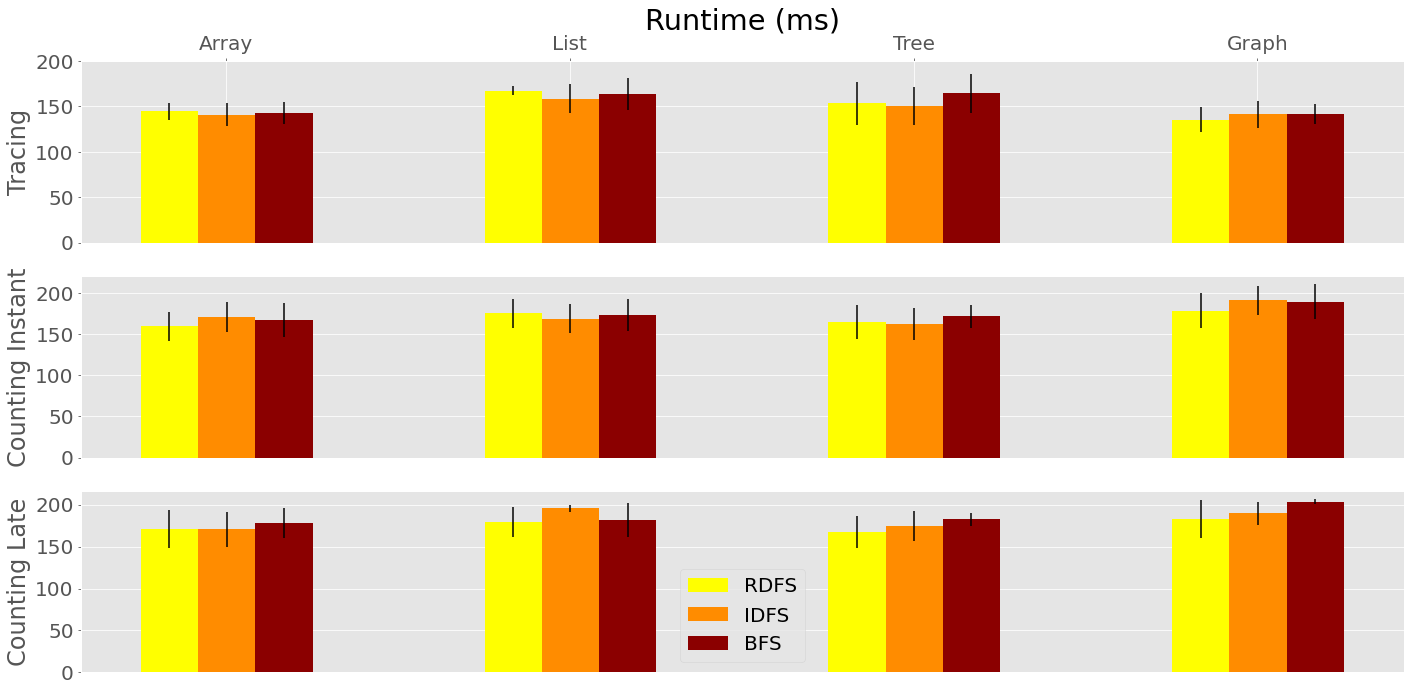

In [45]:
COLORS = ['yellow', 'darkorange', 'darkred']
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20, 10), facecolor='white')
gs = fig.add_gridspec(3,1)
for i, algo in enumerate(ALGOs):
    ax = fig.add_subplot(gs[i, :])
    for x_pos, bm in enumerate(BMs):
        for gta_pos, gta in enumerate(GTAs):
            plt.bar(x_pos*2+gta_pos/3, np.mean(times[(algo, bm, gta)] / 1_000),
                    color=COLORS[gta_pos], label=gta, width=1/3, yerr=np.std(times[(algo, bm, gta)] / 1_000))
    ax.set_yticks(np.arange(0, 200+1, 50))
    ax.set_xticks([])
    ax.set_ylabel(algo.replace("_", " "))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.get_axes()[0].set_xticks(np.arange(0.33, 6.33+0.01, 2), [bm.title() for bm in BMs])
fig.get_axes()[0].xaxis.tick_top()
fig.get_axes()[0].set_title('Runtime (ms)')
plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
plt.savefig('../Plots/times.png')
plt.show()